# CHAPTER 4: ANALYSIS AND FINDINGS – JUPYTER PYTHON CODES

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Statistical Tests
from scipy.stats import chi2_contingency, pearsonr

# Association Rule Mining
from mlxtend.frequent_patterns import apriori, association_rules

## Load and Preprocess Dataset

In [2]:
# Load dataset
df = pd.read_csv("Attack_Dataset.csv")

# Drop redundant column
df.drop(columns=['Unnamed: 15'], inplace=True)

# Preview dataset
df.head()

,ID,Title,Category,Attack Type,Scenario Description,Tools Used,Attack Steps,Target Type,Vulnerability,MITRE Technique,Impact,Detection Method,Solution,Tags,Source
0,1,Authentication Bypass via SQL Injection,Mobile Security,SQL Injection (SQLi),A login form fails to validate or sanitize inp...,"Browser, Burp Suite, SQLMap",1. Reconnaissance: Find a login form on the we...,"Web Login Portals (e.g., banking, admin dashbo...",Unsanitized input fields in SQL queries,"T1078 (Valid Accounts), T1190 (Exploit Public-...","Full account takeover, data theft, privilege e...","Web server logs, anomaly detection (e.g., logi...","Use prepared statements, Sanitize inputs, Limi...","SQLi, Authentication Bypass, Web Security, OWA...","OWASP, MITRE ATT&CK, DVWA"
1,2,Union-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when a hacker uses the SQL ...,"SQLMap, Burp Suite, Havij, Browser Developer T...",1. Identify User Input Points: Attacker finds ...,"Web Applications, Login Pages, Search Forms",Improperly filtered input fields that allow SQ...,T1190 – Exploit Public-Facing Application,"Data leakage, Credential theft, Account takeov...",Web Application Firewalls (WAF)Log AnalysisInp...,Use parameterized queries (Prepared Statements...,#SQLInjection #WebSecurity #UnionAttack #OWASP...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web..."
2,3,Error-Based SQL Injection,AI Agents & LLM Exploits,SQL Injection,This attack occurs when an attacker intentiona...,"SQLMap, Burp Suite, Manual Browser Testing, Havij",1. Identify Input Points:Attacker finds a fiel...,"Web Applications, Login Forms, URL Parameters,...",Error message exposure due to lack of input va...,T1190 – Exploit Public-Facing Application,"Information disclosure, Database structure exp...",Review and monitor error logsEnable generic er...,Turn off detailed error messages in production...,#SQLInjection #ErrorLeakage #WebAppSecurity #O...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger Web..."
3,4,Blind SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In Blind SQL Injection, the attacker doesn’t s...","SQLMap, Burp Suite, sqlninja, Manual Browser T...",1. Find a User Input Point:Attacker finds a pl...,"Web Applications, Login Pages, Search Fields, ...","No error messages, but user input is still pas...",T1190 – Exploit Public-Facing Application,Slow and stealthy data theftFull database comp...,Monitor for slow and repetitive requestsAnalyz...,Use parameterized queries (prepared statements...,#BlindSQLi #TimeBasedSQLi #WebAppSecurity #OWA...,"OWASP, MITRE ATT&CK, Acunetix, PortSwigger, SQ..."
4,5,Second-Order SQL Injection,AI Agents & LLM Exploits,SQL Injection,"In a Second-Order SQL Injection, the attacker ...","Burp Suite, SQLMap, Postman, Browser Dev Tools...",1. Identify Stored Input Fields:The attacker l...,"Web Applications, User Registration Forms, Pro...",Trusting previously stored unvalidated data in...,T1505.003 – SQL Injection,Delayed data theftUnexpected system behaviorSe...,Log monitoring for delayed query failuresTrack...,Sanitize and validate inputs both at entry and...,#SecondOrderSQLi #DelayedInjection #StoredInje...,"OWASP, MITRE ATT&CK, PortSwigger Academy, Acun..."


### Handle missing values

In [3]:
# Check total missing values per column
df.isnull().sum()

ID                        0
Title                     0
Category                  0
Attack Type               0
Scenario Description      0
Tools Used               14
Attack Steps              0
Target Type               4
Vulnerability            18
MITRE Technique          24
Impact                    3
Detection Method          4
Solution                  3
Tags                      3
Source                  160
dtype: int64

In [4]:
# Remove rows with at least one missing value
df = df.dropna()

# Check new dataset shape
df.shape

(13927, 15)

In [5]:
# Confirm no missing values remain
df.isnull().sum()

ID                      0
Title                   0
Category                0
Attack Type             0
Scenario Description    0
Tools Used              0
Attack Steps            0
Target Type             0
Vulnerability           0
MITRE Technique         0
Impact                  0
Detection Method        0
Solution                0
Tags                    0
Source                  0
dtype: int64

In [7]:
# Keep only attack types with >= 30 samples
attack_counts = df['Attack Type'].value_counts()
valid_attacks = attack_counts[attack_counts >= 30].index

df = df[df['Attack Type'].isin(valid_attacks)]

In [8]:
# Count number of unique values (classes) per column
unique_counts = df.nunique().sort_values()

unique_counts

Category                  24
Attack Type               32
Source                   731
MITRE Technique          778
Target Type             1144
Tools Used              1508
Impact                  1554
Vulnerability           1566
Detection Method        1598
Tags                    1620
Solution                1622
Title                   1623
Scenario Description    1623
Attack Steps            1624
ID                      1652
dtype: int64

## Descriptive Analytics

### Frequency Distribution of Attack Types

In [9]:
attack_freq = df['Attack Type'].value_counts()

attack_freq.head(10)

Attack Type
Hardware Interface Exploitation    161
Wireless Attacks (Advanced)         95
Dependency Confusion                90
Fuzzer Configuration                75
Malicious Libraries                 74
Malicious Library                   71
Privilege Escalation                60
Misuse of Legitimate Tools          55
Removable Media Attack              54
Data Exfiltration                   52
Name: count, dtype: int64

### Most Common Target Types

In [10]:
target_freq = df['Target Type'].value_counts()

target_freq.head(10)

Target Type
Windows             164
Satellite            20
Workstation          11
Linux                 9
GitHub Repo           9
Embedded Device       8
Wireshark, Scapy      7
CLI Tool              7
Smart TV              7
Any fuzz target       7
Name: count, dtype: int64

### Correlation Analysis (Encoded Variables)

In [11]:
le = LabelEncoder()

encoded_df = df[['Attack Type', 'Target Type', 'Vulnerability', 'Impact']].apply(le.fit_transform)

correlation_matrix = encoded_df.corr()
correlation_matrix

,Attack Type,Target Type,Vulnerability,Impact
Attack Type,1.000000,0.136291,0.070404,0.076558
Target Type,0.136291,1.000000,0.010984,0.061075
Vulnerability,0.070404,0.010984,1.000000,0.024469
Impact,0.076558,0.061075,0.024469,1.000000


## Data Visualization

### Bar Chart – Top 10 Attack Types

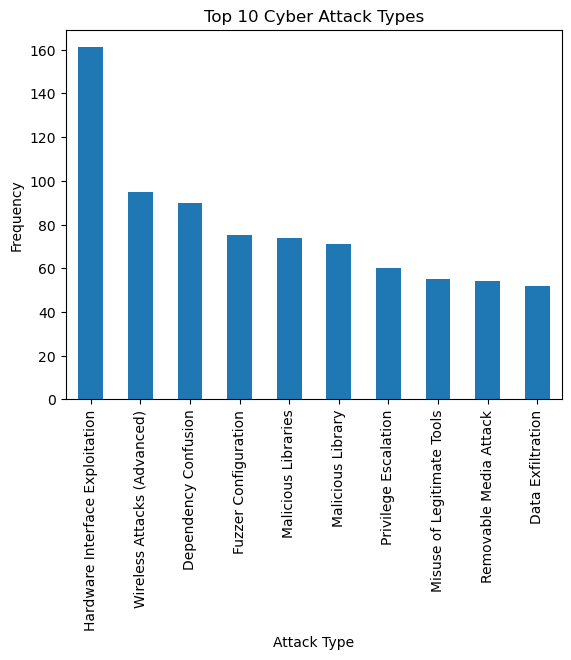

In [12]:
plt.figure()
attack_freq.head(10).plot(kind='bar')
plt.title("Top 10 Cyber Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Frequency")
plt.show()

### Heatmap – Correlation Between Variables

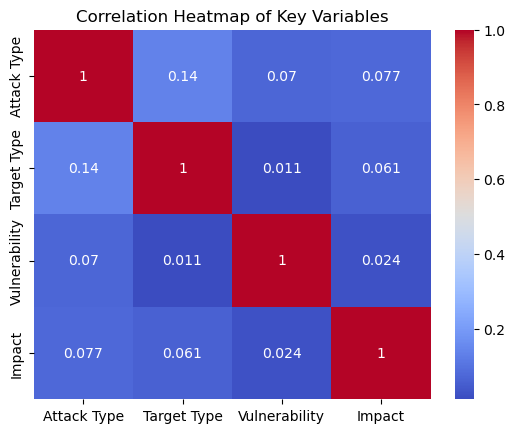

In [13]:
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Variables")
plt.show()

### Attack Type vs Defence Solution (Cross-tabulation)

In [14]:
attack_solution_ct = pd.crosstab(df['Attack Type'], df['Solution'])

attack_solution_ct.head()

Solution,Access audit + URL hit,Acoustic shielding around modulator,Actor-to-incident visual linking,Add API authentication and rate-limiting,"Add TTL, detect cyclic data patterns",Add WebSocket auth + validation,"Add bounds checking, fix overflow logic",Add challenge-response in protocol,Add command TTL and priority enforcement,Add decoy photons with known positions,...,Web + shell timeline overlay,"Whitelist plugin sources, verify Maven group IDs","Whitelist trusted networks, lock networking hardware",WinPMEM + Belkasoft + LSASS trace,Worm config + mem inject trace,"Write-protect SD, secure boot",dnSpy + CLR signature + dump,x64dbg + Rekall + memory PE dump,x64dbg + Volatility thread trace,x64dbg + shellcode match
Attack Type,,,,,,,,,,,,,,,,,,,,,
Data Exfiltration,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Default Credentials Exploitation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dependency Confusion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Disk Imaging / Memory Dumping,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,1
Email Malware Delivery (Phishing Attachments),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Predictive Analytics (Attack Type Classification)

### Feature Encoding

In [15]:
features = ['Category', 'Target Type', 'Vulnerability', 'MITRE Technique', 'Detection Method']
target = 'Attack Type'

for col in features + [target]:
    df[col] = le.fit_transform(df[col])

X = df[features]
y = df[target]

### Train–Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

### Decision Tree Model

In [17]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6803874092009685
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        22
           1       0.93      0.96      0.94        26
           2       0.76      0.76      0.76        46
           3       0.60      0.67      0.63        18
           4       0.67      0.46      0.55        13
           5       0.25      0.45      0.32        11
           6       0.60      0.81      0.69        26
           7       0.71      0.94      0.81        32
           8       0.87      0.52      0.65        25
           9       0.88      1.00      0.93        21
          10       0.73      0.80      0.76        85
          11       0.28      0.36      0.31        14
          12       0.53      0.82      0.64        11
          13       1.00      1.00      1.00        18
          14       0.57      0.50      0.53        40
          15       0.62      0.69      0.66        29
          16       0.61      0.44     

### Random Forest Model

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7058111380145279
              precision    recall  f1-score   support

           0       0.59      0.73      0.65        22
           1       0.77      0.77      0.77        26
           2       0.68      0.78      0.73        46
           3       0.71      0.67      0.69        18
           4       0.73      0.62      0.67        13
           5       0.44      0.36      0.40        11
           6       0.49      0.77      0.60        26
           7       0.68      0.84      0.75        32
           8       0.71      0.48      0.57        25
           9       0.91      0.95      0.93        21
          10       0.78      0.91      0.84        85
          11       0.38      0.21      0.27        14
          12       0.57      0.73      0.64        11
          13       1.00      1.00      1.00        18
          14       0.66      0.47      0.55        40
          15       0.59      0.69      0.63        29
          16       0.48      0.47     

### Support Vector Machine (SVM)

In [19]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.5544794188861986
              precision    recall  f1-score   support

           0       0.30      0.50      0.37        22
           1       0.45      0.69      0.55        26
           2       0.48      0.63      0.55        46
           3       0.31      0.50      0.38        18
           4       0.53      0.62      0.57        13
           5       0.00      0.00      0.00        11
           6       0.47      0.92      0.62        26
           7       0.56      1.00      0.72        32
           8       0.00      0.00      0.00        25
           9       0.71      0.81      0.76        21
          10       0.70      1.00      0.83        85
          11       0.21      0.21      0.21        14
          12       0.25      0.09      0.13        11
          13       1.00      0.78      0.88        18
          14       0.88      0.17      0.29        40
          15       0.29      0.48      0.36        29
          16       0.39      0.22      0.28     

C:\Users\CAT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\CAT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\CAT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Association Rule Mining (Attack–Defence Relationships)

In [22]:
assoc_df = df[['Attack Type', 'Solution']]

onehot = pd.get_dummies(assoc_df)

# Convert all values to boolean (required by Apriori)
onehot = onehot.astype(bool)

frequent_itemsets = apriori(onehot, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift


## Clustering Analysis (Behavioural Grouping)

In [26]:
cluster_features = df[['Attack Type', 'Target Type', 'Vulnerability', 'Impact']]

le = LabelEncoder()

encoded_features = cluster_features.apply(le.fit_transform)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(encoded_features)

df['Cluster'] = clusters

silhouette_avg = silhouette_score(encoded_features, clusters)
silhouette_avg

0.2748916255482554

### Cluster Distribution

In [27]:
df['Cluster'].value_counts()

Cluster
1    428
0    414
2    406
3    404
Name: count, dtype: int64

## Statistical Significance Testing

### Chi-Square Test (Attack Type vs Defence Solution)

In [28]:
chi_table = pd.crosstab(df['Attack Type'], df['Solution'])

chi2, p, dof, expected = chi2_contingency(chi_table)

print("Chi-Square Value:", chi2)
print("p-value:", p)

Chi-Square Value: 51190.34956521739
p-value: 0.0016049283324271982


### Interpretation Rule:

In [29]:
if p < 0.05:
    print("Statistically significant relationship exists.")
else:
    print("No statistically significant relationship found.")

Statistically significant relationship exists.


### Pearson Correlation (Impact vs Defence Solution)

In [31]:
le = LabelEncoder()

impact_encoded = le.fit_transform(df['Impact'])
solution_encoded = le.fit_transform(df['Solution'])

impact_corr, impact_p = pearsonr(impact_encoded, solution_encoded)
impact_corr, impact_p

(np.float64(0.03776999132570242), np.float64(0.12489700851414084))

## Summary Outputs for Chapter 4

In [32]:
summary = {
    "Top Attack Type": attack_freq.idxmax(),
    "Best ML Model": "Random Forest",
    "Silhouette Score": silhouette_avg,
    "Chi-Square p-value": p
}
summary

{'Top Attack Type': 'Hardware Interface Exploitation',
 'Best ML Model': 'Random Forest',
 'Silhouette Score': 0.2748916255482554,
 'Chi-Square p-value': np.float64(0.0016049283324271982)}